# Linear Regression with Tensorflow

In [1]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
INFO:tensorflow:Disabling eager execution
INFO:tensorflow:Disabling v2 tensorshape
Instructions for updating:
non-resource variables are not supported in the long term
INFO:tensorflow:Disabling resource variables
INFO:tensorflow:Disabling tensor equality
INFO:tensorflow:Disabling control flow v2


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Data preparation

In [3]:
x_train = [1, 2, 3]

In [4]:
y_train = [2+0.1 +1, 4 -0.1+1, 6+0.5+1] # adjust the noises !

Text(0, 0.5, 'Y')

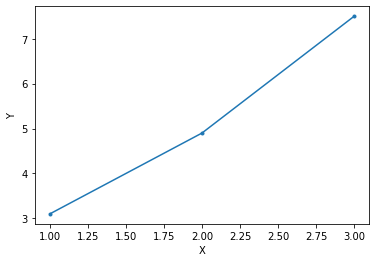

In [5]:
plt.plot(x_train, y_train,'.-')
plt.xlabel('X')
plt.ylabel('Y')

$$ y = 2x +1$$

$$ y = wx + b $$

### Initialization  (초기화)

In [6]:
w0 = 7; #바꾸어보세요
b0 = -10; #바꾸어보세요

In [7]:
W = tf.Variable(w0*tf.ones([1]), name='weight')
b = tf.Variable(b0*tf.ones([1]), name='bias')

### Our hypothesis XW+b

In [8]:
hypothesis = x_train * W + b

### Cost function

In [9]:
cost = tf.reduce_mean(tf.square(hypothesis - y_train)) #MSE, Mean squared error

### Optimizer 설정

In [10]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
#optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

### Launch the graph in a session & Initializes global variables in the graph

In [11]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

### Train the model !

In [12]:
nb_epoch = 2000

In [13]:
vw = [] # empty list
vb = [] 
vcost = []

In [14]:
for step in range(nb_epoch+1):
    sess.run(train)

    w1 = sess.run(W)[0] # slope
    b1 = sess.run(b)[0] # bias
    cost1 = sess.run(cost)
    
    vw.append(w1)
    vb.append(b1)
    vcost.append(cost1)
    
    if step % 100 == 0: # 100번마다 결과 출력해보기 (안해도 되지만..)
        print(step, '--', cost1, '--',  w1, '--', b1)

0 -- 16.672506 -- 6.9826665 -- -9.976666
100 -- 10.306961 -- 5.9222956 -- -7.694986
200 -- 6.38266 -- 5.126064 -- -5.8849645
300 -- 3.9576824 -- 4.500153 -- -4.462122
400 -- 2.4591908 -- 4.0081296 -- -3.343637
500 -- 1.5332144 -- 3.6213546 -- -2.4644065
600 -- 0.9610176 -- 3.3173141 -- -1.7732509
700 -- 0.6074348 -- 3.0783107 -- -1.22994
800 -- 0.38894212 -- 2.8904321 -- -0.80284804
900 -- 0.253927 -- 2.7427425 -- -0.46711496
1000 -- 0.17049594 -- 2.6266453 -- -0.20319837
1100 -- 0.11894048 -- 2.535382 -- 0.0042642145
1200 -- 0.08708239 -- 2.463641 -- 0.16734867
1300 -- 0.06739604 -- 2.4072459 -- 0.29554793
1400 -- 0.05523098 -- 2.3629138 -- 0.39632484
1500 -- 0.047713723 -- 2.3280652 -- 0.4755447
1600 -- 0.04306854 -- 2.3006709 -- 0.53781843
1700 -- 0.04019813 -- 2.2791362 -- 0.5867708
1800 -- 0.03842439 -- 2.2622087 -- 0.62525207
1900 -- 0.037328307 -- 2.2489018 -- 0.6555018
2000 -- 0.036651015 -- 2.2384412 -- 0.6792808


In [15]:
w1 = sess.run(W)[0] # slope
b1 = sess.run(b)[0] # bias
str1 = 'y={:.3}x + {:.3}'.format(w1, b1)
print(w1, b1)
print(str1)

2.2384412 0.6792808
y=2.24x + 0.679


Text(0.5, 1.0, 'y=2.24x + 0.679')

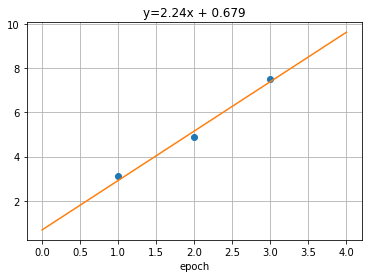

In [16]:
#plt.figure(dpi=150)
plt.plot(x_train, y_train,'o')

x1 = np.min(x_train)-1, np.max(x_train)+1
y1 = np.dot(w1,x1) + b1
plt.plot(x1, y1)
plt.grid()
plt.xlabel('epoch')
plt.title(str1)

Text(0.5, 1.0, 'history of w')

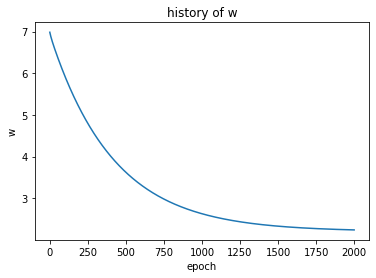

In [17]:
plt.plot(vw)
plt.xlabel('epoch')
plt.ylabel('w')
plt.title('history of w')

Text(0.5, 1.0, 'history of b')

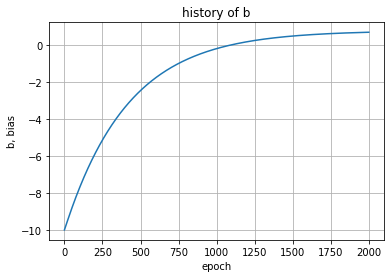

In [18]:
plt.plot(vb)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('b, bias')
plt.title('history of b')

Text(0, 0.5, 'loss (MSE)')

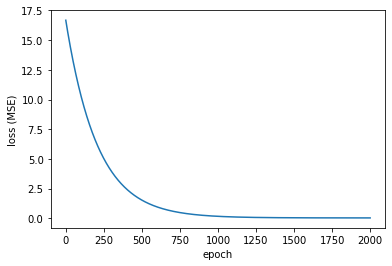

In [19]:
plt.plot(vcost)
plt.xlabel('epoch')
plt.ylabel('loss (MSE)')